In [7]:
import numpy as np
from itertools import product
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time

m = 5
n = 400 # 400, 800, 1200, 1600, 2000
DEBUG = True

def fPC(y, yhat):
    return np.mean(y == yhat)

def measureAccuracyOfPredictors(predictors, X, y):
    yhat = np.zeros(y.shape)
    for r1,c1,r2,c2 in predictors:
        yhat += X[:,r1,c1] > X[:,r2,c2]
    yhat = yhat/len(predictors) > 0.5
    return fPC(y, yhat)

def stepwiseRegression(trainingFaces, trainingLabels, testingFaces, testingLabels):
    
    start_time = time.time()
    best, loc = 0, None
    preds = [] # predictors
    pixels = [x for x in product(range(0,24), repeat = 4) 
              if (x[0],x[1]) != (x[2],x[3])]
    
    for i in range(m):
        
        if DEBUG:
            print("Current Step : ", i)
            print(f'{round((time.time() - start_time)/60, 3)} minutes elapsed')
            
        for p in pixels:
            if p in preds: continue
            acc = measureAccuracyOfPredictors(preds + [p], X=trainingFaces, y=trainingLabels)            
            best = max(acc, best)
            loc = p if best == acc else loc
            
        
        if DEBUG:
            print("Best pixels : ", loc)
            print("Best Accuracy : ", best)
        
        preds.append(loc)

    show = True
    if show:
        im = testingFaces[0,:,:]
        fig,ax = plt.subplots(1)
        ax.imshow(im, cmap='gray')
        
        for r1,c1,r2,c2 in predictors:
            color = np.random.rand(3,)
            rect = patches.Rectangle((c1 - 0.5, r1 - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            rect = patches.Rectangle((c2 - 0.5, r2 - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
        
        plt.show()
        
        
    return preds, best

def loadData (which):
    faces = np.load("{}ingFaces.npy".format(which))
    faces = faces.reshape(-1, 24, 24)  # Reshape from 576 to 24x24
    labels = np.load("{}ingLabels.npy".format(which))
    return faces, labels


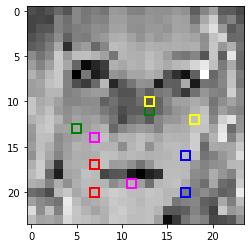

In [12]:
predictors=[(20, 7, 17, 7),(13, 5, 11, 13),(20, 17, 16, 17),(12, 18, 10, 13),(19, 11, 14, 7)]
colors = ['red', 'green', 'blue', 'yellow', 'magenta']    
im = testingFaces[0,:,:]
fig,ax = plt.subplots(1)
ax.imshow(im, cmap='gray')

for i, (r1,c1,r2,c2) in enumerate(predictors):
    color = np.random.rand(3,)
    rect = patches.Rectangle((c1 - 0.5, r1 - 0.5), 1, 1, linewidth=2, edgecolor=colors[i], facecolor='none')
    ax.add_patch(rect)
    rect = patches.Rectangle((c2 - 0.5, r2 - 0.5), 1, 1, linewidth=2, edgecolor=colors[i], facecolor='none')
    ax.add_patch(rect)

plt.show()

Current Step :  0
0.004 minutes elapsed
Best pixels :  (20, 7, 17, 7)
Best Accuracy :  0.7105
Current Step :  1
0.429 minutes elapsed
Best pixels :  (13, 5, 11, 13)
Best Accuracy :  0.7155
Current Step :  2
1.046 minutes elapsed
Best pixels :  (20, 17, 16, 17)
Best Accuracy :  0.7645
Current Step :  3
1.819 minutes elapsed
Best pixels :  (12, 18, 10, 13)
Best Accuracy :  0.77
Current Step :  4
2.793 minutes elapsed
Best pixels :  (19, 11, 14, 7)
Best Accuracy :  0.784


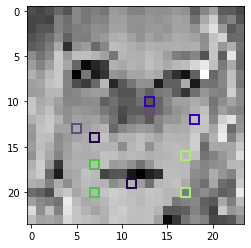

n 	 trainAccuracy 	 testAccuracy
Current Step :  0
0.003 minutes elapsed
Best pixels :  (21, 16, 17, 7)
Best Accuracy :  0.71
Current Step :  1
0.218 minutes elapsed
Best pixels :  (13, 4, 11, 14)
Best Accuracy :  0.745
Current Step :  2
0.483 minutes elapsed
Best pixels :  (20, 6, 15, 8)
Best Accuracy :  0.79
Current Step :  3
0.791 minutes elapsed
Best pixels :  (12, 5, 11, 13)
Best Accuracy :  0.805
Current Step :  4
1.146 minutes elapsed
Best pixels :  (18, 7, 16, 7)
Best Accuracy :  0.825


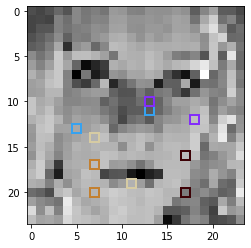

n 	 0.825 	 0.7358
Current Step :  0
0.003 minutes elapsed
Best pixels :  (20, 7, 17, 7)
Best Accuracy :  0.7125
Current Step :  1
0.27 minutes elapsed
Best pixels :  (13, 5, 11, 13)
Best Accuracy :  0.72625
Current Step :  2
0.605 minutes elapsed
Best pixels :  (18, 12, 16, 17)
Best Accuracy :  0.77625
Current Step :  3
0.986 minutes elapsed
Best pixels :  (13, 18, 15, 8)
Best Accuracy :  0.78625
Current Step :  4
1.461 minutes elapsed
Best pixels :  (19, 8, 14, 16)
Best Accuracy :  0.80875


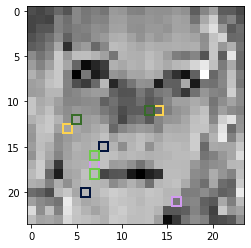

n 	 0.8088 	 0.7549
Current Step :  0
0.003 minutes elapsed


KeyboardInterrupt: 

In [8]:
testingFaces, testingLabels = loadData("test")
trainingFaces, trainingLabels = loadData("train")

trainl, testl = [], []
predictors, train_acc = stepwiseRegression(trainingFaces, trainingLabels, testingFaces, testingLabels)
print('n \t trainAccuracy \t testAccuracy')
for a in range(1,6):
    predictors, train_acc = stepwiseRegression(trainingFaces[:400*a], trainingLabels[:400*a], testingFaces, testingLabels)
    test_acc = measureAccuracyOfPredictors(predictors, testingFaces, testingLabels)
    trainl.append(train_acc)
    testl.append(test_acc)
    print(f'{400*a} \t {round(train_acc,4)} \t {round(test_acc,4)}')

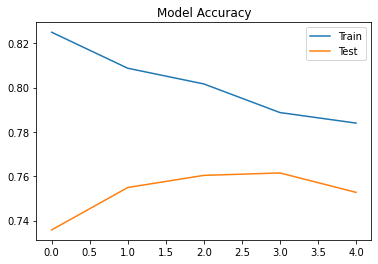

In [3]:
plt.plot(trainl, label="Train")
plt.plot(testl, label="Test")
plt.title("Model Accuracy")
plt.legend()
plt.show()

As the number of training examples increases, the accuracy of the training set decreases but the accuracy of the testing set increases, except for the test accuracy for when training n=2000. Had this last test accuracy increased, the curves would be essentially inverse, flipped along the y axis. Again, disregarding the final test accuracy, it appears that the curves would eventually converge and stabilize around a value of 0.78.

With the simplicity of the model, it is possible that it became overfit using the full 2000 images, and using just 1600 training images is optimal for the model.